In [ ]:
from bs4 import BeautifulSoup as BS
import requests as r
import pandas as pd
import json

## Задание 1. Произведите автоматический сбор информации из Интернет-ресурса по отзывам посетителей.

In [ ]:
%%time
url = 'https://www.banki.ru/services/responses/bank/tcs/'
USER = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Safari/605.1.15"}
i = 1
flag = False
reviews = []
date = []
rating = []
while flag == True:
  result = r.get(url, headers=USER)
  soup = BS(result.content,'html.parser')
  texts = soup.findAll('script', type='application/ld+json')[0].text.replace('&lt;p&gt', '').replace('&lt;/p&gt;', '').replace('\r', '').replace('\n', '').replace('\t', '').replace('\\', '').replace('\xa0', '')
  info = json.loads(texts)
  if len(info['review']) == 0:
    break
  else:
    for j in range(len(info['review'])):
        reviews.append(info['review'][j]['description'])
        date.append(info['review'][j]['datePublished'])
        rating.append(info['review'][j]['reviewRating']['ratingValue'])
    i += 1
    print(i)
    url = f'https://www.banki.ru/services/responses/bank/tcs/?page={i}&is_countable=on'

In [ ]:
data = pd.DataFrame({'Date':date, 'Review': reviews, 'Rating':rating})
data

,Date,Review,Rating
0,2023-09-25 13:06:16,;Хотел бы поделиться впечатлением о службе под...,5
1,2023-09-22 10:58:10,";Три дня жена не может пользоваться картой, ко...",2
2,2023-09-21 08:43:54,;Доброго дня! Хочу оставить отзыв о чате банка...,5
3,2023-09-17 16:28:17,";Спасибо большое за работу, нарвался на машенн...",5
4,2023-09-13 09:53:18,;Случилась у меня эпопея с поддержкой и провер...,5
...,...,...,...
6820,2023-04-18 22:54:23,;После пополнения в банкомате деньги не поступ...,4
6821,2023-04-18 22:39:50,;повелась на рекламу о самых быстрых переводах...,1
6822,2023-04-18 21:44:09,;Пытался оформить платёжный стикер в приложени...,1
6823,2023-04-18 21:41:59,";Считаю Тинькофф Лучшим банком, из тех, карты ...",5


In [ ]:
data.to_csv('tinkoff_reviews.csv')

In [ ]:
reviews[0][0] # пример отзыва

{'@type': 'Review',
 'author': 'user-213815083294',
 'datePublished': '2023-09-25 13:06:16',
 'description': ';Хотел бы поделиться впечатлением о службе поддержки Тинькофф Банка.;Начну с того, что я оплатил на одном из сайтов услугу. Все было отлично, но спустя сутки этот сайт списал дополнительнуже сумму +500₽, помимо оплаченной услуги. Я понятия не имел за что это. Сразу же написал в чат онлайн банка по сложившейся ситуаци. Специалист банка дал моментальный ответ, и разъяснил, что сайт автоматически подключил подписку при оплате услуги. После всего этого, мне помогли вернуть деньги за якобы &quot;подписку&quot;. За что сотруднику поддерлет огромное спасибо',
 'name': 'Тинькофф банк',
 'reviewRating': {'@type': 'Rating',
  'bestRating': '5',
  'ratingValue': '5',
  'worstRating': '1'}}

In [ ]:
data = pd.read_csv('tinkoff_reviews.csv')

In [ ]:
data

,Unnamed: 0,Date,Review,Rating
0,0,2023-09-25 13:06:16,;Хотел бы поделиться впечатлением о службе под...,5
1,1,2023-09-22 10:58:10,";Три дня жена не может пользоваться картой, ко...",2
2,2,2023-09-21 08:43:54,;Доброго дня! Хочу оставить отзыв о чате банка...,5
3,3,2023-09-17 16:28:17,";Спасибо большое за работу, нарвался на машенн...",5
4,4,2023-09-13 09:53:18,;Случилась у меня эпопея с поддержкой и провер...,5
...,...,...,...,...
6820,6820,2023-04-18 22:54:23,;После пополнения в банкомате деньги не поступ...,4
6821,6821,2023-04-18 22:39:50,;повелась на рекламу о самых быстрых переводах...,1
6822,6822,2023-04-18 21:44:09,;Пытался оформить платёжный стикер в приложени...,1
6823,6823,2023-04-18 21:41:59,";Считаю Тинькофф Лучшим банком, из тех, карты ...",5


## Задание 2. Проведите предпроцессинг данных (очистку данных, удалите выбросов, пустые значения и т.д). Выполните описательную статистику.

In [ ]:
data['Review'] = data['Review'].apply(lambda x: x.replace(';', ''))

In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data['Rating'] = data['Rating'].map(str)

In [ ]:
data

,Date,Review,Rating
0,2023-09-25 13:06:16,Хотел бы поделиться впечатлением о службе подд...,5
1,2023-09-22 10:58:10,"Три дня жена не может пользоваться картой, кот...",2
2,2023-09-21 08:43:54,Доброго дня! Хочу оставить отзыв о чате банка ...,5
3,2023-09-17 16:28:17,"Спасибо большое за работу, нарвался на машенни...",5
4,2023-09-13 09:53:18,Случилась у меня эпопея с поддержкой и проверк...,5
...,...,...,...
6820,2023-04-18 22:54:23,После пополнения в банкомате деньги не поступи...,4
6821,2023-04-18 22:39:50,"повелась на рекламу о самых быстрых переводах,...",1
6822,2023-04-18 21:44:09,Пытался оформить платёжный стикер в приложении...,1
6823,2023-04-18 21:41:59,"Считаю Тинькофф Лучшим банком, из тех, карты к...",5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6825 non-null   object
 1   Review  6825 non-null   object
 2   Rating  6825 non-null   object
dtypes: object(3)
memory usage: 160.1+ KB


Date - отражает дату и время отзыва

Review - текст отзыва

Rating - оценка работы банка от 1 до 5

Предпроцессинг не нужен, так как данные чисты, выбросов в нашем датасете не наблюдается

In [ ]:
data.shape

(6825, 3)

## Задание 3. Проведите анализ предметной области и сделайте несколько практических выводов, исходя из данных. (Визуализация и выводы)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data['Month'] = data['Date'].apply(lambda x: int(x[5:7]))
data['Month']

0       9
1       9
2       9
3       9
4       9
       ..
6820    4
6821    4
6822    4
6823    4
6824    4
Name: Month, Length: 6825, dtype: int64

In [ ]:
data['Month'].unique()

array([9, 8, 7, 6, 5, 4])

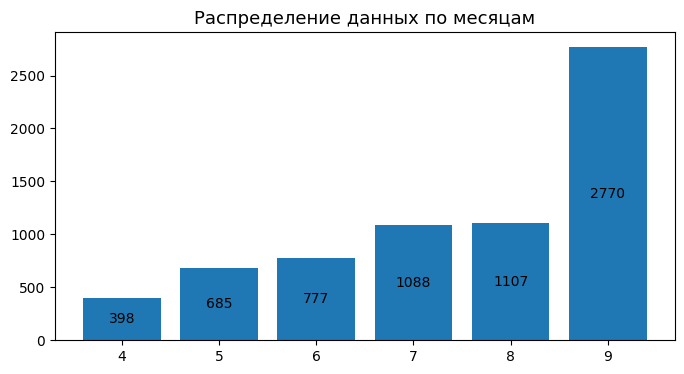

In [ ]:
# распределение по годам оценки
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4))  # создание рабочей области

ax.set_title('Распределение данных по месяцам', color = 'black', size = 13)   # названия графика
ax.bar(data['Month'].unique(), data['Month'].value_counts())
ax.bar_label(ax.containers[0], label_type = 'center')

In [ ]:
data['Rating'] = data['Rating'].map(int)
mean = data.groupby('Month')['Rating'].mean()
mean

Month
4    3.625628
5    3.598540
6    3.522523
7    4.085478
8    4.650903
9    4.625113
Name: Rating, dtype: float64

In [ ]:
import numpy as np

In [ ]:
unique = np.flip(data['Month'].unique())
unique

array([4, 5, 6, 7, 8, 9])

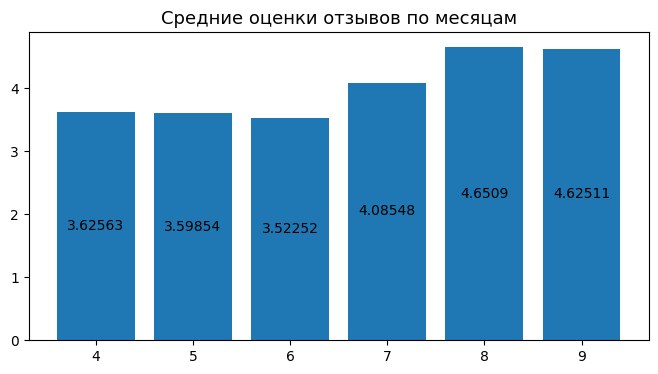

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4))  # создание рабочей области

ax.set_title('Средние оценки отзывов по месяцам', color = 'black', size = 13)   # названия графика
ax.bar(unique, mean)
ax.bar_label(ax.containers[0], label_type = 'center')

In [ ]:
values = data['Rating'].value_counts()
values

5    5364
1    1055
2     174
4     174
3      58
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Кол-во отзывов по оценкам')

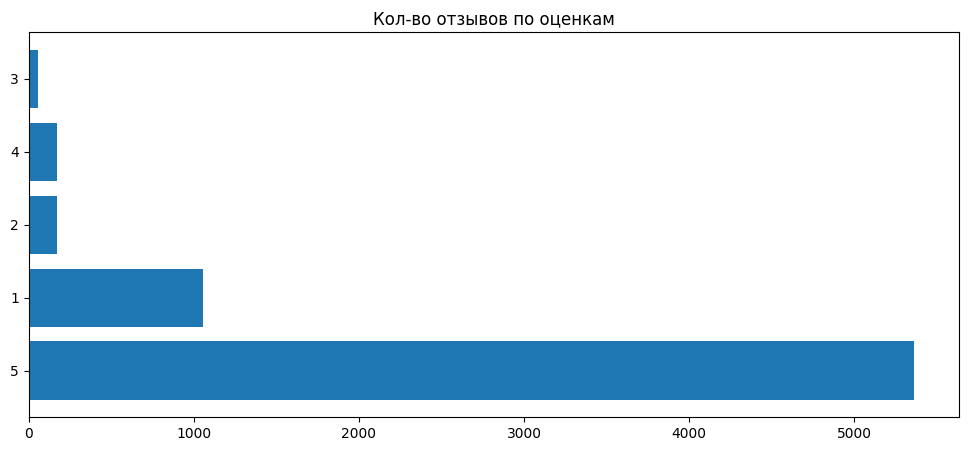

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.subplots()
plt.barh(values.index, values.values)
plt.title('Кол-во отзывов по оценкам')

Мы видим, что Тинькофф показывает себя как банк с высокими оценками. Наименьший класс - 3 звезды

## Облако слов

In [ ]:
data

,Date,Review,Rating,Month
0,2023-09-25 13:06:16,Хотел бы поделиться впечатлением о службе подд...,5,9
1,2023-09-22 10:58:10,"Три дня жена не может пользоваться картой, кот...",2,9
2,2023-09-21 08:43:54,Доброго дня! Хочу оставить отзыв о чате банка ...,5,9
3,2023-09-17 16:28:17,"Спасибо большое за работу, нарвался на машенни...",5,9
4,2023-09-13 09:53:18,Случилась у меня эпопея с поддержкой и проверк...,5,9
...,...,...,...,...
6820,2023-04-18 22:54:23,После пополнения в банкомате деньги не поступи...,4,4
6821,2023-04-18 22:39:50,"повелась на рекламу о самых быстрых переводах,...",1,4
6822,2023-04-18 21:44:09,Пытался оформить платёжный стикер в приложении...,1,4
6823,2023-04-18 21:41:59,"Считаю Тинькофф Лучшим банком, из тех, карты к...",5,4


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
stopwords = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 999.5, 999.5, -0.5)

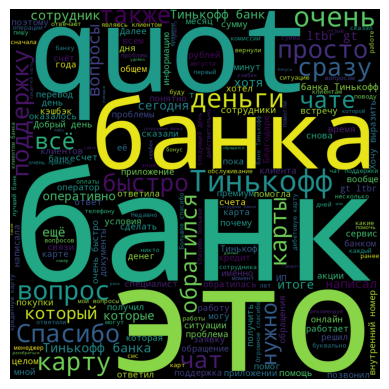

In [ ]:
cloud = WordCloud(stopwords=stopwords, width = 1000, height = 1000).generate(data.Review.str.cat(sep='; '))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
!pip install pymorphy2

In [ ]:
nltk.download('punkt')
import pymorphy2
from nltk.tokenize import word_tokenize
import re
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
cleaned_data = data['Review'].apply(lambda x: re.sub(re.compile('[^А-Яа-яA-Za-z0-9]+'), ' ', x))
# оставим в текстах новостей только слова (без знаков)
cleaned_data = cleaned_data.apply(lambda x: x.lower()) # для обработки слов
# разделим текст новости на отдельные слова
tokenized_data = cleaned_data.apply(lambda x: word_tokenize(x))

filtered_data = tokenized_data.apply(lambda x: [word for word in x if word not in stopwords]) # удаление стоп слов
#token = word_tokenize(data.Review.str.cat(sep='; ')) # чтобы провести стемматизацию воспользуемся библиотекой pymorphy2
stemmer = SnowballStemmer("russian")
stemmed_data = filtered_data.apply(lambda x:[stemmer.stem(word) for word in x])
morph = pymorphy2.MorphAnalyzer()
morph_data = filtered_data.apply(lambda x:[morph.parse(word)[0].normal_form for word in x][2:])
finished = [' '.join(map(str, i)) for i in morph_data]

In [ ]:
finished = ' '.join(map(str, finished))

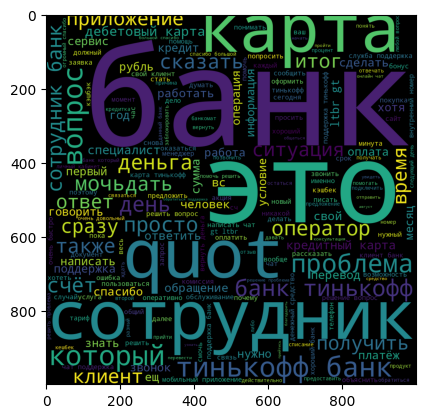

In [ ]:
cloud_new = WordCloud(stopwords=stopwords, width = 1000, height = 1000).generate(finished)
plt.imshow(cloud_new)

## Задание 4. Проведите обработку текста. Сравните классы

По предыдущему классу можно сделать вывод, что данные неравномерно распределены среди классов. Чтобы избежать неправильного обучения моделей и добиться высокой точности моделей, можно провести балансировку данных

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Подготовка данных для обучения и тестирования
X = data['Review']
y = data['Rating']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование текстовых данных в числовой формат с использованием TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Выводим распределение классов до применения Oversampling
print("Распределение классов до Oversampling:")
print(y_train.value_counts())

Распределение классов до Oversampling:
5    4289
1     844
2     142
4     136
3      49
Name: Rating, dtype: int64


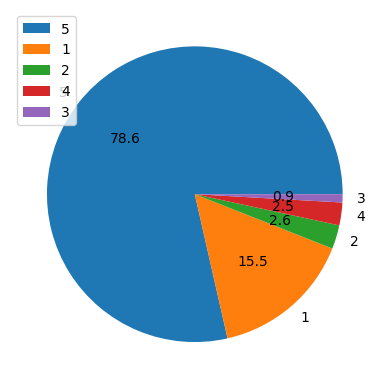

In [ ]:
plt.pie(y_train.value_counts().values, labels=y_train.value_counts().index, autopct='%.1f')
plt.legend()

In [ ]:
print(y_test.value_counts())

5    1075
1     211
4      38
2      32
3       9
Name: Rating, dtype: int64


https://vc.ru/ml/129738-algoritm-balansirovki-klassov-smote

In [ ]:
# SMOTE для Oversampling
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

In [ ]:
# Выводим распределение классов после применения Oversampling
print("Распределение классов до Oversampling:")
print(y_train_resampled.value_counts())

Распределение классов до Oversampling:
5    4289
4    4289
1    4289
2    4289
3    4289
Name: Rating, dtype: int64


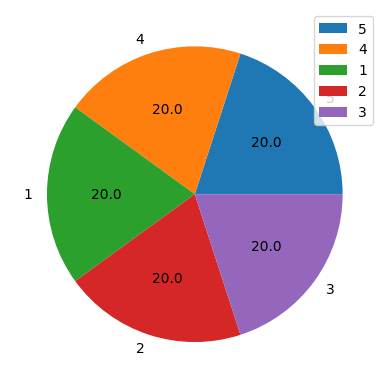

In [ ]:
plt.pie(y_train_resampled.value_counts().values, labels=y_train_resampled.value_counts().index, autopct='%.1f')
plt.legend()

Так как выборка отзывов оказалось слишком большой, что в последствии может повлиять на точность предсказания, отсортируем отзывы на 2 класса: 1 - хорошие (без претензий), 0 - плохие (с претензиями)

In [ ]:
data['Rating'] = data['Rating'].map(int)

In [ ]:
data['Binary'] = data['Rating'].apply(lambda x: 1 if x%5 == 0 else 0)
data

,Date,Review,Rating,Binary
0,2023-09-25 13:06:16,Хотел бы поделиться впечатлением о службе подд...,5,1
1,2023-09-22 10:58:10,"Три дня жена не может пользоваться картой, кот...",2,0
2,2023-09-21 08:43:54,Доброго дня! Хочу оставить отзыв о чате банка ...,5,1
3,2023-09-17 16:28:17,"Спасибо большое за работу, нарвался на машенни...",5,1
4,2023-09-13 09:53:18,Случилась у меня эпопея с поддержкой и проверк...,5,1
...,...,...,...,...
6820,2023-04-18 22:54:23,После пополнения в банкомате деньги не поступи...,4,0
6821,2023-04-18 22:39:50,"повелась на рекламу о самых быстрых переводах,...",1,0
6822,2023-04-18 21:44:09,Пытался оформить платёжный стикер в приложении...,1,0
6823,2023-04-18 21:41:59,"Считаю Тинькофф Лучшим банком, из тех, карты к...",5,1


In [ ]:
data['Binary'].value_counts()

1    5364
0    1461
Name: Binary, dtype: int64

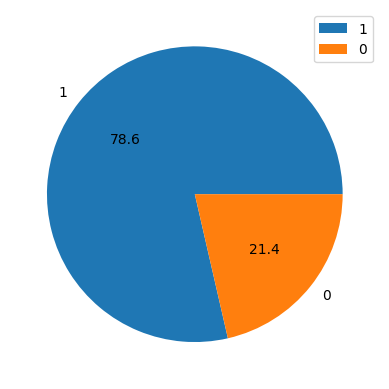

In [ ]:
plt.pie(data['Binary'].value_counts().values, labels=data['Binary'].value_counts().index, autopct='%.1f')
plt.legend()

In [ ]:
X = data['Review']
y = data['Binary']

# Разделение данных на обучающий и тестовый наборы
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование текстовых данных в числовой формат с использованием TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf_new = tfidf_vectorizer.fit_transform(X_train_new)
X_test_tfidf_new = tfidf_vectorizer.transform(X_test_new)

In [ ]:
# Воспользуемся Undersmapling для балансировки данных по классам
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=0)
X_train_resampled_new, y_train_resampled_new = rus.fit_resample(X_train_tfidf_new, y_train_new)
print(sorted(Counter(y_train_resampled_new).items()))

[(0, 1171), (1, 1171)]


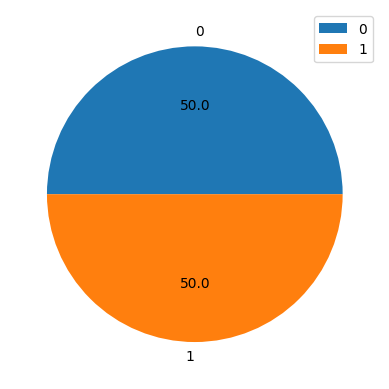

In [ ]:
plt.pie(y_train_resampled_new.value_counts().values, labels=y_train_resampled_new.value_counts().index, autopct='%.1f')
plt.legend()

## Задание 5. Примените 4 метода машинного обучения и результаты оформите по примеру таблицы 1.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

Посмотрим, как работают модели МО на изначальной несбалансированной выборке

In [ ]:
res = pd.DataFrame(columns=['Run time', 'Training time', 'Test time', 'Accuracy'])

In [ ]:
classifiers = {'Random forest': RandomForestClassifier(random_state=42), 'k Nearest Neighbors': KNeighborsClassifier(),
               'Logistic regression': LogisticRegression(), 'Multi-layer perceptron': MLPClassifier()}

for k, v in classifiers.items():
  start_time = time.time()
  v.fit(X_train_tfidf, y_train)
  end_time = time.time()
  training = end_time - start_time
  start_test_time = time.time()
  y_pred = v.predict(X_test_tfidf)
  end_test_time = time.time()
  print(f'Отчет для модели {k}')
  print(classification_report(y_test, y_pred))

  answer = {
      "Run time": (end_time - start_time) + (end_test_time - start_test_time),
      "Training time": training,
      "Test time": end_test_time - start_test_time,
      "Accuracy": accuracy_score(y_test, y_pred)
  }
  res.loc[k] = answer

Отчет для модели Random forest
              precision    recall  f1-score   support

           1       0.82      0.34      0.48       211
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        38
           5       0.84      1.00      0.91      1075

    accuracy                           0.84      1365
   macro avg       0.33      0.27      0.28      1365
weighted avg       0.79      0.84      0.79      1365



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Отчет для модели k Nearest Neighbors
              precision    recall  f1-score   support

           1       0.62      0.79      0.70       211
           2       0.14      0.03      0.05        32
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        38
           5       0.93      0.94      0.94      1075

    accuracy                           0.86      1365
   macro avg       0.34      0.35      0.34      1365
weighted avg       0.83      0.86      0.85      1365



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Отчет для модели Logistic regression
              precision    recall  f1-score   support

           1       0.80      0.79      0.79       211
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        38
           5       0.92      0.99      0.95      1075

    accuracy                           0.90      1365
   macro avg       0.34      0.36      0.35      1365
weighted avg       0.85      0.90      0.87      1365



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Отчет для модели Multi-layer perceptron
              precision    recall  f1-score   support

           1       0.81      0.86      0.84       211
           2       0.33      0.03      0.06        32
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        38
           5       0.94      0.99      0.96      1075

    accuracy                           0.91      1365
   macro avg       0.42      0.38      0.37      1365
weighted avg       0.87      0.91      0.89      1365



Заметим, что модели на данной выборке очень плохо определяют отзывы с 2, 3, 4 звездами. Это может быть обсуловлено нехваткой данных

In [ ]:
res

,Run time,Training time,Test time,Accuracy
Random forest,6.955319,6.859569,0.095750,0.838095
k Nearest Neighbors,51.260287,0.027607,51.232680,0.864469
Logistic regression,5.579097,5.576239,0.002858,0.902564
Multi-layer perceptron,198.287477,198.276289,0.011188,0.914286


Посмотрим, как работают модели машинного обучения на сбалансированной выборке (Oversampling)

In [ ]:
res1 = pd.DataFrame(columns=['Run time', 'Training time', 'Test time', 'Accuracy'])

In [ ]:
classifiers = {'Random forest': RandomForestClassifier(random_state=42), 'k Nearest Neighbors': KNeighborsClassifier(),
               'Logistic regression': LogisticRegression(), 'Multi-layer perceptron': MLPClassifier()}

for k, v in classifiers.items():
  start_time = time.time()
  v.fit(X_train_resampled, y_train_resampled)
  end_time = time.time()
  training = end_time - start_time
  start_test_time = time.time()
  y_pred = v.predict(X_test_tfidf)
  end_test_time = time.time()
  print(f'Отчет для модели {k}')
  print(classification_report(y_test, y_pred))
  answer = {
      "Run time": (end_time - start_time) + (end_test_time - start_test_time),
      "Training time": training,
      "Test time": end_test_time - start_test_time,
      "Accuracy": accuracy_score(y_test, y_pred)
  }
  res1.loc[k] = answer

Отчет для модели Random forest
              precision    recall  f1-score   support

           1       0.75      0.49      0.60       211
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        38
           5       0.86      0.99      0.92      1075

    accuracy                           0.85      1365
   macro avg       0.32      0.30      0.30      1365
weighted avg       0.80      0.85      0.82      1365



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Отчет для модели k Nearest Neighbors
              precision    recall  f1-score   support

           1       0.39      0.44      0.41       211
           2       0.04      0.31      0.08        32
           3       0.01      0.11      0.01         9
           4       0.02      0.47      0.05        38
           5       1.00      0.00      0.00      1075

    accuracy                           0.09      1365
   macro avg       0.29      0.27      0.11      1365
weighted avg       0.85      0.09      0.07      1365



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Отчет для модели Logistic regression
              precision    recall  f1-score   support

           1       0.75      0.91      0.82       211
           2       0.20      0.06      0.10        32
           3       0.00      0.00      0.00         9
           4       0.13      0.05      0.08        38
           5       0.95      0.96      0.96      1075

    accuracy                           0.90      1365
   macro avg       0.41      0.40      0.39      1365
weighted avg       0.88      0.90      0.89      1365

Отчет для модели Multi-layer perceptron
              precision    recall  f1-score   support

           1       0.79      0.89      0.84       211
           2       0.33      0.03      0.06        32
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        38
           5       0.95      0.99      0.97      1075

    accuracy                           0.92      1365
   macro avg       0.41      0.38      0.37      1365


На данной выборке Логистическая регрессия показывает уже болле хорошие результаты, но все равно далекие от реальности.

In [ ]:
res1

,Run time,Training time,Test time,Accuracy
Random forest,39.154347,39.052618,0.101729,0.853480
k Nearest Neighbors,429.885923,0.036767,429.849155,0.090110
Logistic regression,11.349134,11.345845,0.003289,0.901832
Multi-layer perceptron,331.236117,331.224185,0.011932,0.917949


Посмотрим, как работают модели машинного обучения на сбалансированной выборке (Undersampling)

In [ ]:
# Разделим классы на: 1 - без претензий, 2 - с претензиями
X, y

(0       Хотел бы поделиться впечатлением о службе подд...
 1       Три дня жена не может пользоваться картой, кот...
 2       Доброго дня! Хочу оставить отзыв о чате банка ...
 3       Спасибо большое за работу, нарвался на машенни...
 4       Случилась у меня эпопея с поддержкой и проверк...
                               ...                        
 6820    После пополнения в банкомате деньги не поступи...
 6821    повелась на рекламу о самых быстрых переводах,...
 6822    Пытался оформить платёжный стикер в приложении...
 6823    Считаю Тинькофф Лучшим банком, из тех, карты к...
 6824    Здравствуйте. Хочу поделиться опытом взаимодей...
 Name: Review, Length: 6825, dtype: object,
 0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6820    0
 6821    0
 6822    0
 6823    1
 6824    1
 Name: Binary, Length: 6825, dtype: int64)

In [ ]:
res2 = pd.DataFrame(columns=['Run time', 'Training time', 'Test time', 'Accuracy'])

In [ ]:
classifiers = {'Random forest': RandomForestClassifier(random_state=42), 'k Nearest Neighbors': KNeighborsClassifier(),
               'Logistic regression': LogisticRegression(), 'Multi-layer perceptron': MLPClassifier()}

for k, v in classifiers.items():
  start_time = time.time()
  v.fit(X_train_resampled_new, y_train_resampled_new)
  end_time = time.time()
  training = end_time - start_time
  start_test_time = time.time()
  y_pred = v.predict(X_test_tfidf_new)
  end_test_time = time.time()
  print(f'Отчет для модели {k}')
  print(classification_report(y_test_new, y_pred))
  answer = {
      "Run time": (end_time - start_time) + (end_test_time - start_test_time),
      "Training time": training,
      "Test time": end_test_time - start_test_time,
      "Accuracy": accuracy_score(y_test_new, y_pred)
  }
  res2.loc[k] = answer

Отчет для модели Random forest
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       290
           1       0.95      0.88      0.92      1075

    accuracy                           0.88      1365
   macro avg       0.81      0.86      0.83      1365
weighted avg       0.89      0.88      0.88      1365

Отчет для модели k Nearest Neighbors
              precision    recall  f1-score   support

           0       0.47      0.90      0.61       290
           1       0.96      0.72      0.83      1075

    accuracy                           0.76      1365
   macro avg       0.71      0.81      0.72      1365
weighted avg       0.86      0.76      0.78      1365

Отчет для модели Logistic regression
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       290
           1       0.96      0.90      0.93      1075

    accuracy                           0.89      1365
   macro avg       0.83

На этйо выборке можем увидеть, что модели работают в разы лучше, два класса уже достаточно хорошо можно определить метод многослойного перцептрона. Точность достигает 0.91

In [ ]:
res2

,Run time,Training time,Test time,Accuracy
Random forest,6.733307,6.633737,0.099570,0.875458
k Nearest Neighbors,21.273173,0.002441,21.270732,0.758974
Logistic regression,0.442743,0.442142,0.000601,0.894505
Multi-layer perceptron,80.908064,80.889596,0.018467,0.907692


<Axes: >

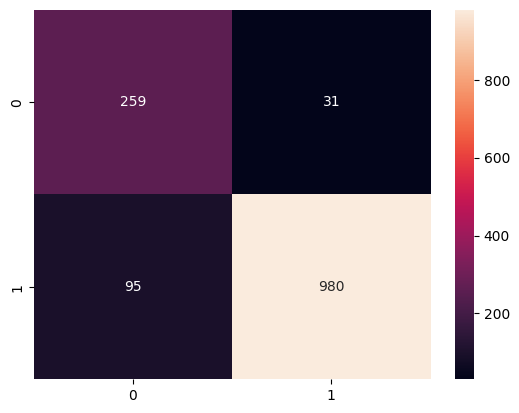

In [ ]:
sns.heatmap(confusion_matrix(y_test_new, y_pred), annot=True, fmt='d')